In [2]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据
Boston = pd.read_csv('波士顿房价数据集.csv')
head = Boston.head()
head


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# 采用info查看数据集信息
Boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


数据总共有506行，14个变量，而且这14个变量都有506个非空的float64类型的数值，即所有变量没有空值。

In [4]:
# 描述性统计分析
describe = Boston.describe().T
print(describe)


         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

没有发现异常情况，但是可能有变量存在极端值的情况，会直接影响后续模型的开发，所以需要通过散点图直接看各个自变量与因变量的关系。

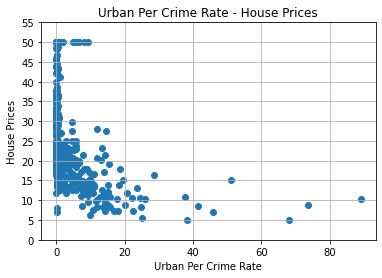

In [5]:
# 散点图分析
def drawing(x,y,xlabel):
    plt.scatter(x,y)
    plt.title('%s - House Prices'% xlabel)
    plt.xlabel(xlabel)
    plt.ylabel('House Prices')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()

# 绘制变量CRIM和因变量的散点图
drawing(Boston['CRIM'],Boston['target'],'Urban Per Crime Rate')


从散点图的数据分布可以看出，房价基本和犯罪率呈负相关的关系，高房价的房屋都集中在低犯罪率地区，如果城镇人均犯罪率超过20%的情况，房价最高不高于20。

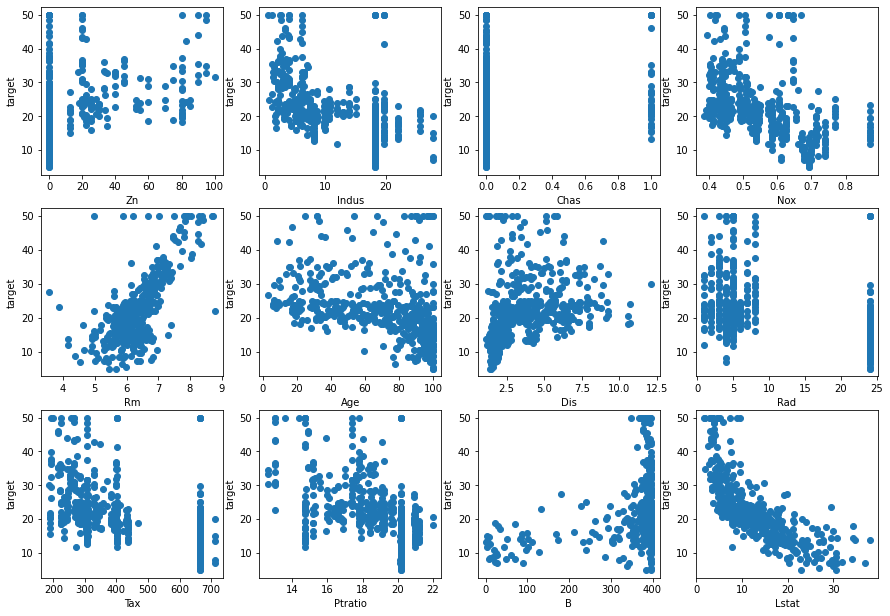

In [6]:
plt.figure(figsize=(15,10.5))
plot_count = 1
for feature in list(Boston.columns)[1:13]:
    plt.subplot(3,4,plot_count)
    plt.scatter(Boston[feature],Boston['target'])
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('target')
    plot_count += 1
plt.show()


ZN表示住宅用地所占比例，从散点图可以看出，其与因变量target并没有明显的线性关系

INDUS表示城镇中非商业用地所占比例，当城镇中非商业用地所占比例处于(0,5)区间的情况下，房价不低于15

CHAS表示地产是否处于查尔斯河边，1表示在河边，0表示不在河边，地产不在查尔斯河边的情况下，房价处于(5,55)区间，地产在查尔斯河边的情况下，房价最低不低于10

NOX表示一氧化碳的浓度，整体看NOX与因变量target具有负的相关关系

RM表示每栋住宅的房间数，很明显两者之间存在较强的线性关系。

AGE表示1940年之前建成的业主自住单位的占比，自住单位的占比处于(0,60)的情况下，房价最底不会低于15.

DIS表示距离5个波士顿就业中心的平均距离，一般来说距离就业中心近则上下班距离近，人更愿意住在上下班距离近的地方，根据市场规律，需求高则房价会高，从散点图的数据分布来看，整体与因变量target呈负的相关关系。

RAD表示距离高速公路的接近指数，绝大多数房价高于30的房产，都集中在距离高速公路的接近指数低的地区。

TAX表示每一万美元的不动产产税率，在税率大于600的情况下，房价会低于10。

PTRATIO表示城镇中学生教师比例，学生教师比例小于14的情况下，房价最低不低于20，绝大部分高于30，只有在学生教师比例大于20的情况下，房价会低于10，绝大部分不高于30.

B表示城镇中黑人比例，在黑人比例高于350的地区，房价会高于30.

LSTAT表示低收入阶层占比，从散点图看，很明显与因变量target具有负的相关关系。



             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<AxesSubplot:>

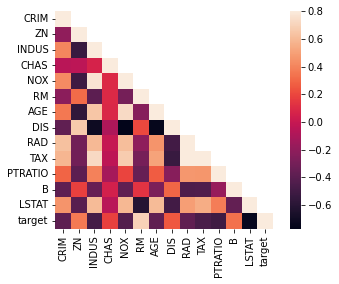

In [7]:
# 相关系数计算
corr = Boston.corr()
print(corr)

# 绘制相关矩阵图形
import seaborn as sn
varcorr = Boston[Boston.columns].corr()
mask = np.array(varcorr)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(varcorr,mask=mask,vmax=0.8,square=True,annot=False)


与因变量target相关程度最高的三个变量是LSTAT、RM、PTRATIO，通过如下程序获取相关程度最大的变量列表：

In [8]:
# 获取相关程度最大的三个变量
print(Boston.corr().abs().nlargest(4,'target').index)


Index(['target', 'LSTAT', 'RM', 'PTRATIO'], dtype='object')


根据变量之间相关程度的结果，我们可以选取上述三个自变量进入模型训练之中。

### 建立模型

In [11]:
# 创建两个数据帧X和Y
X = pd.DataFrame(np.c_[Boston['LSTAT'],Boston['RM'],Boston['PTRATIO']],columns=['LSTAT','RM','PTRATIO'])
y = Boston['target']


In [12]:
# 对数据集进行分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5)


In [13]:
# 调用线性回归库进行模型拟合
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [14]:
# 打印模型的截距
print(model.intercept_)


23.68107026871481


In [17]:
# 打印出参数的估计系数
coeffcients = pd.DataFrame([X_train.columns,model.coef_]).T
coeffcients = coeffcients.rename(columns={0:'Attribute',1:'Coeffcients'})
coeffcients


,Attribute,Coeffcients
0,LSTAT,-0.646971
1,RM,3.91693
2,PTRATIO,-0.954833


得到线性回归方程如下：

target=23.68107026871482−0.646971×LSTAT+3.91693×RM−0.954833×PTRATIO

## 模型评估

#### 模型拟合完成之后，可以对模型进行测试评估，为了了解拟合的模型的效果，可以使用R方进行衡量，R方主要用来评估数据与回归数据的拟合程度，R方的值越接近1，则表示该模型拟合得越好：

In [18]:
# 评估模型
print('R-Squared: %.4f'% model.score(X_test, y_test))


R-Squared: 0.6916


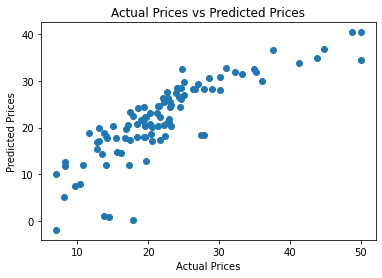

In [19]:
# 绘制预测值与实际值的散点图
plt.figure()
price_pred = model.predict(X_test)
plt.scatter(y_test,price_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


从上述两图可以看出，因变量取值为50时为离散值，较为异常，对拟合模型的效果有重大的影响，所以必须删除取值为50的观测样本，之后在进行模型拟合：

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


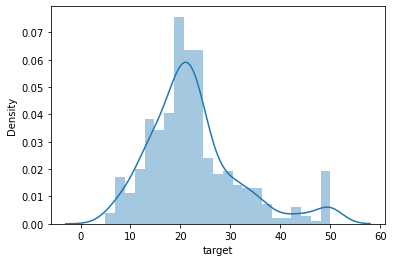

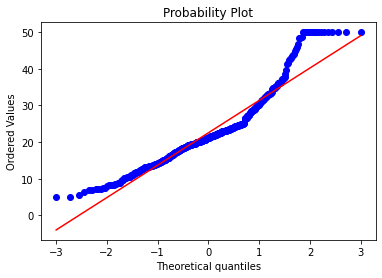

In [20]:
from scipy import stats
sn.distplot(Boston['target'],hist=True);
fig = plt.figure()
res = stats.probplot(Boston['target'],plot=plt)


从上述两图可以看出，因变量取值为50时为离散值，较为异常，对拟合模型的效果有重大的影响，所以必须删除取值为50的观测样本，之后在进行模型拟合：

In [21]:
# 删除因变量值为50的点
Boston_new = Boston[Boston['target']<50]
Boston_new.info()
X_new = pd.DataFrame(np.c_[Boston_new['LSTAT'],Boston_new['RM'],Boston_new['PTRATIO']],columns=['LSTAT','RM','PTRATIO'])
y_new = Boston_new['target']
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(X_new,y_new,test_size = 0.2,random_state=5)
model = LinearRegression()
model.fit(X_new_train,y_new_train)
print('R-Squared: %.4f'% model.score(X_new_test, y_new_test))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     490 non-null    float64
 1   ZN       490 non-null    float64
 2   INDUS    490 non-null    float64
 3   CHAS     490 non-null    int64  
 4   NOX      490 non-null    float64
 5   RM       490 non-null    float64
 6   AGE      490 non-null    float64
 7   DIS      490 non-null    float64
 8   RAD      490 non-null    int64  
 9   TAX      490 non-null    int64  
 10  PTRATIO  490 non-null    float64
 11  B        490 non-null    float64
 12  LSTAT    490 non-null    float64
 13  target   490 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 57.4 KB
R-Squared: 0.7571
